In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV

import re

%matplotlib inline

quakes = pd.read_csv("./data/data.csv")

print quakes.head()

                       time  latitude  longitude  depth  mag magType  nst  \
0  1901-08-09T18:33:00.000Z        40        144      0  7.5      mw  NaN   
1  1901-08-09T13:01:00.000Z       -22        170      0  7.9      mw  NaN   
2  1902-04-19T02:23:00.000Z        14        -91      0  7.5      mw  NaN   
3  1902-09-23T20:18:00.000Z        16        -93      0  7.8      mw  NaN   
4  1902-09-22T01:46:00.000Z        18        146      0  7.5      mw  NaN   

   gap  dmin  rms    ...                      updated  \
0  NaN   NaN  NaN    ...     2015-05-13T18:52:41.000Z   
1  NaN   NaN  NaN    ...     2015-05-13T18:52:41.000Z   
2  NaN   NaN  NaN    ...     2015-05-13T18:52:41.000Z   
3  NaN   NaN  NaN    ...     2015-05-13T18:52:41.000Z   
4  NaN   NaN  NaN    ...     2015-05-13T18:52:41.000Z   

                                       place        type horizontalError  \
0        off the east coast of Honshu, Japan  earthquake             NaN   
1           southeast of the Loyalty Islan

In [3]:
from sklearn.cross_validation import train_test_split

def cross_validate(model, X, y, cv=3):
    return cross_validation.cross_val_score(model, X, y, cv=cv).mean()

def train_test_splitter(model, X, y, train_size=0.5):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_size)
    model.fit(X_train, y_train)
    return X_train, X_test, y_train, y_test, model

In [4]:
def magclassify(mag):
    if mag < 4:
        return 0
    elif mag < 5:
        return 1
    elif mag < 6:
        return 2
    elif mag < 7:
        return 3
    elif mag < 8:
        return 4
    elif mag >= 8:
        return 5
# "minor" "light" "moderate" "strong" "major" "great"   

def classifyMagType(magType):
    duration = ["Md", "md"]
    local = ["ml"]
    shortPS = ["mb_lg", "lg", "mblg"]
    shortPeriodWave = ["mb"]
    twenty = ["ms", "ms_20"]
    moment = ["mi", "mwp"]
    energy = ["me"]
    
    mw = ["mw", "mwb", "mwc","mwr","mww"]
    magType = str(magType).lower()
    if magType in duration:
        return 0
    elif magType in local:
        return 1
    elif magType in shortPS:
        return 2
    elif magType in shortPeriodWave:
        return 3
    elif magType in twenty:
        return 4
    elif magType in moment:
        return 5
    elif magType in energy:
        return 6
    elif magType in mw:
        return 7
    else:
        return 8    
    
def parse_date(Dates):
    return int(Dates[0:4]), int(Dates[5:7]), int(Dates[8:10]), int(Dates[11:13])

In [5]:
def add_features():
    quakes["magClassified"] = quakes["mag"].apply(magclassify)
    quakes["depth"] = quakes["depth"].fillna(quakes["depth"].median())
    quakes["magTypeClassified"] =  quakes["magType"].apply(classifyMagType)
    quakes["year"] = quakes.time.apply(lambda x: parse_date(x)[0])
    quakes["month"] = quakes.time.apply(lambda x: parse_date(x)[1])
    quakes["hour"] = quakes.time.apply(lambda x: parse_date(x)[3])
    
    
add_features()

In [14]:
# OKLAHOMA QUAKES

# Latitude:36.981738°
# Longitude:-100.014728°
    
# Latitude:34.000465°
# Longitude:-94.50327°
    
    
quakes = quakes[(quakes.latitude > 34.000465) & (quakes.latitude < 36.981738)]
quakes = quakes[(quakes.longitude > -100.014728) & (quakes.longitude < -94.50327)]


print quakes

                            time  latitude  longitude   depth  mag magType  \
30461   1974-12-16T02:30:21.400Z   35.3300   -97.4800  10.000  2.6      ml   
34803   1975-10-12T02:58:11.200Z   34.8160   -97.4060  20.000  3.2      lg   
35159   1975-09-13T01:25:02.800Z   34.1390   -97.3690   5.000  3.4      lg   
38847   1975-11-29T14:29:40.900Z   34.5210   -97.3470   5.000  3.5      lg   
41289   1976-04-19T04:42:42.200Z   36.1340   -99.8410   5.000  3.5     NaN   
41331   1976-04-16T18:59:44.200Z   36.1070   -99.8750   5.000  3.4     NaN   
56373   1979-06-07T07:39:35.600Z   35.1870   -99.8120   5.000  3.0     NaN   
60872   1979-09-13T00:49:19.800Z   35.2190   -99.5180   5.000  3.4     NaN   
71274   1980-11-02T10:00:49.300Z   35.4720   -97.7770   8.000  3.0     NaN   
72259   1981-07-11T21:09:22.540Z   34.8840   -97.6770   5.000  3.5    mblg   
77971   1982-05-03T07:54:50.000Z   34.0700   -96.3800   5.000  3.0    mblg   
90626   1984-02-03T04:38:27.110Z   34.6570   -97.3940   5.000  3

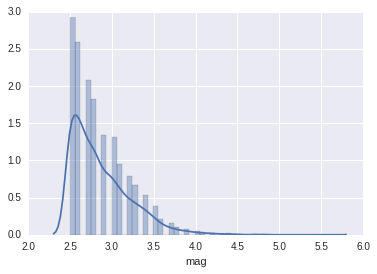

In [16]:
sns.distplot(quakes.mag)

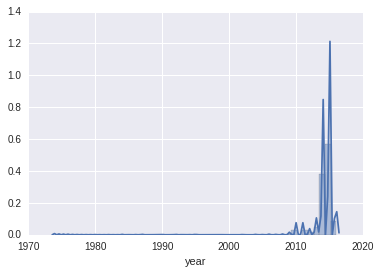

In [18]:
sns.distplot(quakes.year)

In [ ]:
# OKLAHOMA QUAKES

# Latitude:36.981738°
# Longitude:-100.014728°
    
# Latitude:34.000465°
# Longitude:-94.50327°

In [42]:
def get_marker_color(magnitude):
    if magnitude < 4.0:
        return ('go') # minor
    elif magnitude < 5.0:
        return ('ko') # light
    elif magnitude < 5.0:
        return ('yo') # moderate
    elif magnitude < 6.0:
        return ('mo') # strong
    elif magnitude < 7.0:
        return ('ro') # major
    else:
        return ('wo') # great
    

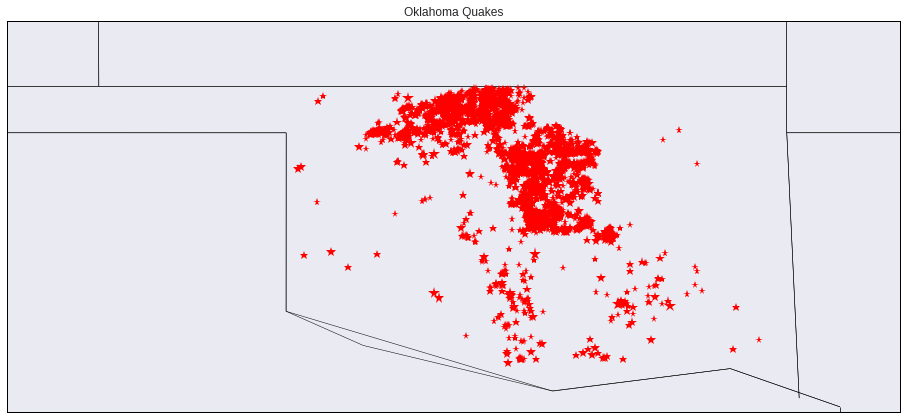

In [47]:
from mpl_toolkits.basemap import Basemap

plt.figure(figsize=(16,12))

my_map = Basemap(llcrnrlon=-103, llcrnrlat=33.5, urcrnrlon=-93.4, urcrnrlat=37.7, projection='cyl',
              resolution='c' )


lats = np.array(quakes.latitude)
longs = np.array(quakes.longitude)
mags = np.array(quakes.mag)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.drawmapboundary()
my_map.drawstates()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))
# my_map.bluemarble()

for lon, lat, mag in zip(longs, lats, mags):
    x,y = my_map(lon, lat)
    marker_string = get_marker_color(mag)
    my_map.plot(x, y, 'r*', markersize=mag*3)
    
plt.title('Oklahoma Quakes')
plt.show()